## 三、Plotting with categorical data
- what if one of the main variables you are interested in is categorical? In this case, the scatterplot and regression model approach won’t work. 
- seaborn的类别数据绘图被分为三部分：一是在类别变量中每一水平上显示每个样本swarmplot() and stripplot()，二是样本分布的抽象表征boxplot() and violinplot()，三是运用统计估计，包括测量中心趋势和置信区间barplot() and pointplot()。
> - It’s useful to divide seaborn’s categorical plots into three groups: those that show each observation at each level of the categorical variable, those that show an abstract representation of each distribution of observations, and those that apply a statistical estimation to show a measure of central tendency and confidence interval. 
> - The first includes the functions swarmplot() and stripplot(), the second includes boxplot() and violinplot(), and the third includes barplot() and pointplot(). 
> - These functions all share a basic API for how they accept data, although each has specific parameters that control the particulars of the visualization that is applied to that data.

In [48]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

### 1 Categorical scatterplots


- 显示类别变量不同水平的定量数据，带状绘图stripplot()
> - A simple way to show the the values of some quantitative variable across the levels of a categorical variable uses stripplot(), which generalizes a scatterplot to the case where one of the variables is categorical

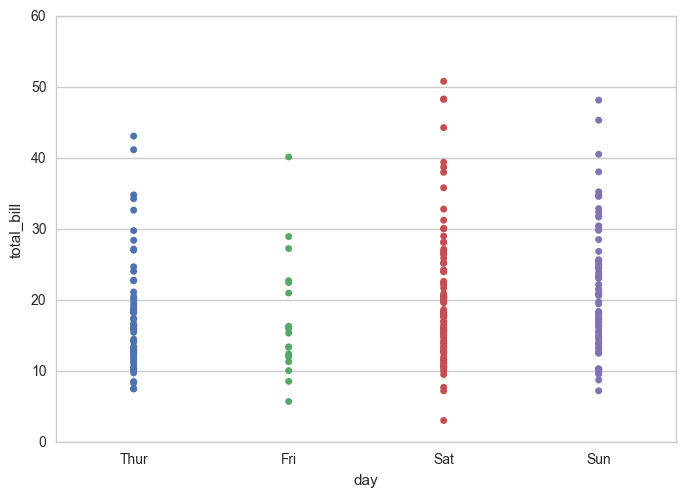

In [49]:
sns.stripplot(x="day", y="total_bill", data=tips);

- 带状图中，散点容易互相覆盖，因而不容易看到数据的全部分布。一个解决办法是沿类别轴调整位置，通过使用随机jitter
> - In a strip plot, the scatterplot points will usually overlap. This makes it difficult to see the full distribution of data. One easy solution is to adjust the positions (only along the categorical axis) using some random “jitter”

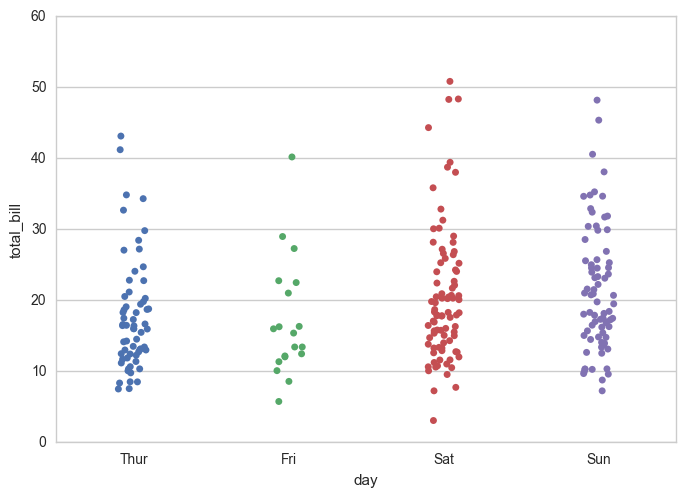

In [50]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

- 另一个方法是使用函数swarmplot()，它会通过算法重新沿类别轴放置散点
> - A different approach would be to use the function swarmplot(), which positions each scatterplot point on the categorical axis with an algorithm that avoids overlapping points

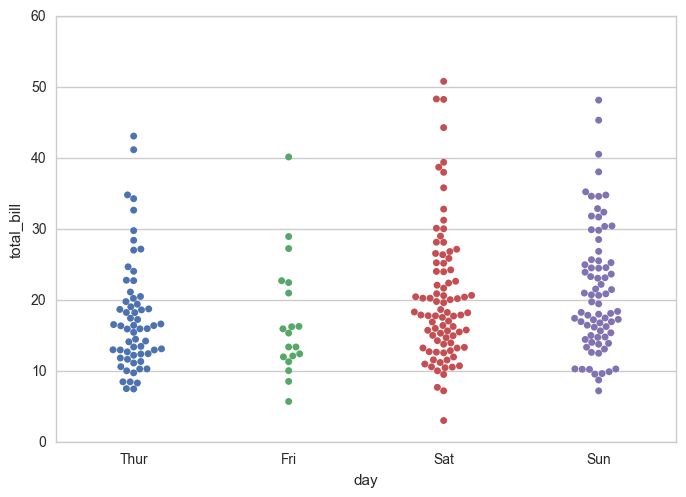

In [51]:
sns.swarmplot(x="day", y="total_bill", data=tips);

- 通过参数hue增加新的类别变量
> - It’s also possible to add a nested categorical variable with the hue parameter. Above the color and position on the categorical axis are redundant, but now each provides information about one of the two variables

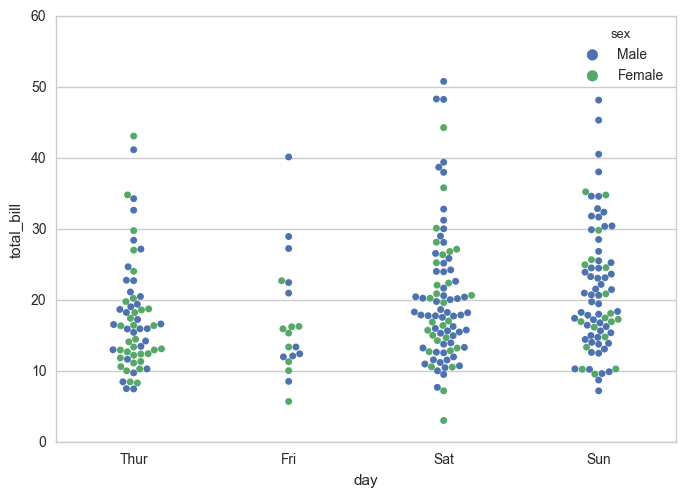

In [52]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

- 类别排列顺序：默认自动推测，但是pandas的类别数据类型，则可指定；DataFrame格式则按出现顺序显示
> - In general, the seaborn categorical plotting functions try to infer the order of categories from the data. 
> - If your data have a pandas Categorical datatype, then the default order of the categories can be set there. > > - For other datatypes, string-typed categories will be plotted in the order they appear in the DataFrame, but categories that look numerical will be sorted

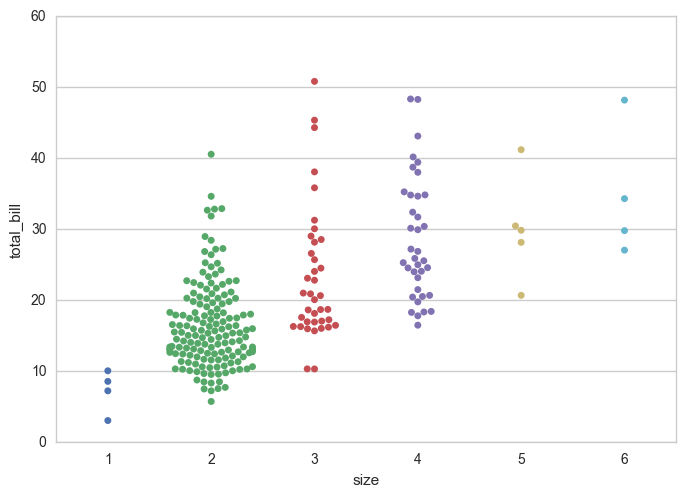

In [53]:
sns.swarmplot(x="size", y="total_bill", data=tips);

- 可以指定图形的方向，不过默认会通过传入数据的类型推测
> - With these plots, it’s often helpful to put the categorical variable on the vertical axis (this is particularly useful when the category names are relatively long or there are many categories). 
> - You can force an orientation using the orient keyword, but usually plot orientation can be inferred from the datatypes of the variables passed to x and/or y

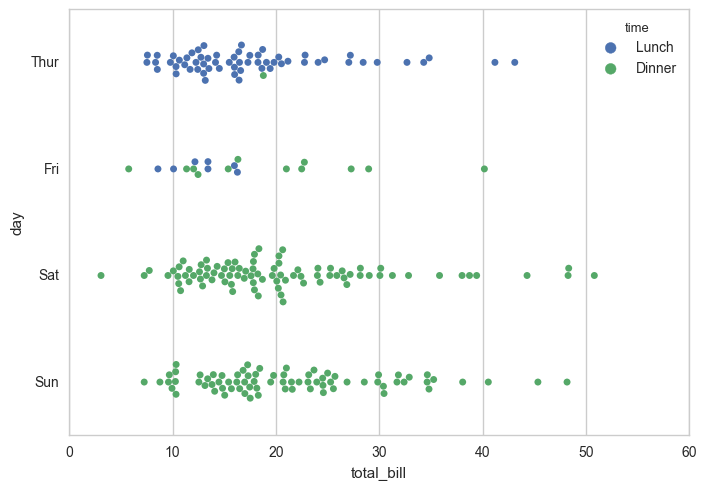

In [54]:
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

### 2 类别样本的分布（Distributions of observations within categories）

#### 2.1 箱型图（Boxplots）
- This kind of plot shows the three quartile values of the distribution along with extreme values. 
- The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 
- Importantly, this means that each value in the boxplot corresponds to an actual observation in the data:

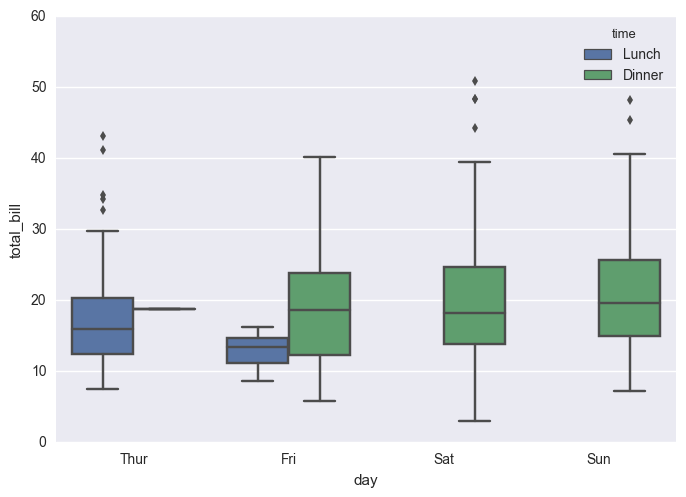

In [9]:
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

#### 2.2 小提琴图（Violinplots）
- combines a boxplot with the kernel density estimation procedure described in the distributions tutorial

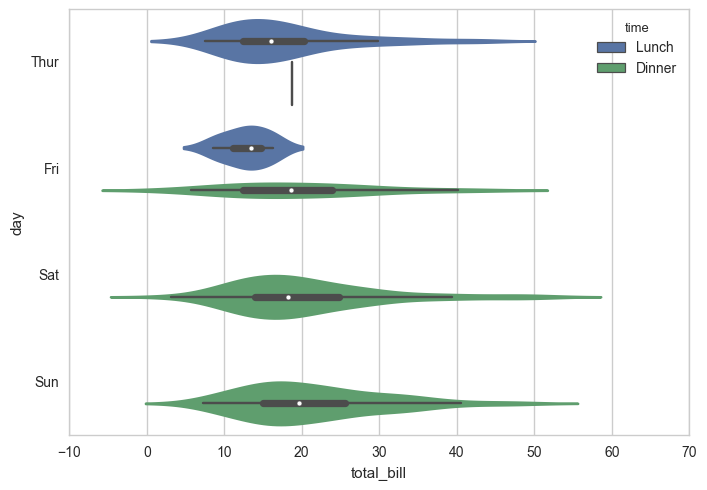

In [55]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

- 这种方法使用核密度估计，能够对数据分布提供更好的描述。相比于boxplot，需要使用更多的参数
> - This approach uses the kernel density estimate to provide a better description of the distribution of values. > - Additionally, the quartile and whikser values from the boxplot are shown inside the violin. 
> - Because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot

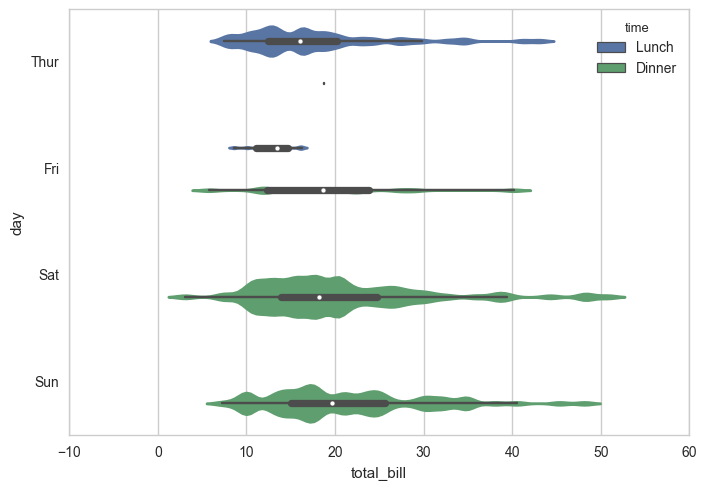

In [56]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

- 当hue参数只有两个水平时，能够分割小提琴
> - It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space:

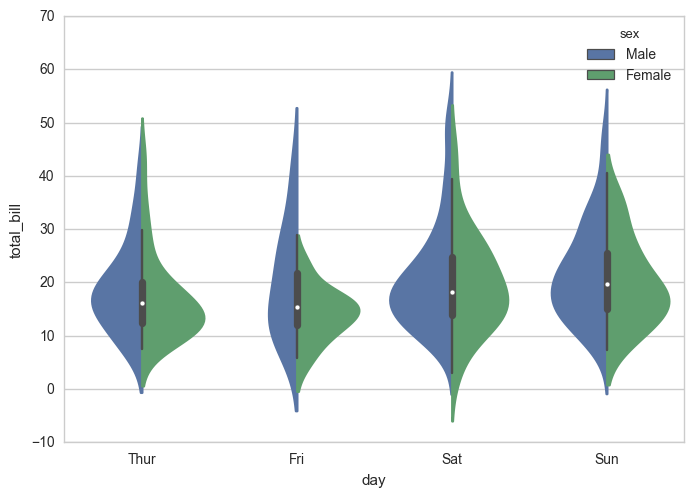

In [57]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

- 可以改变小提琴内显示的内容，如显示每个样本
> - Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values

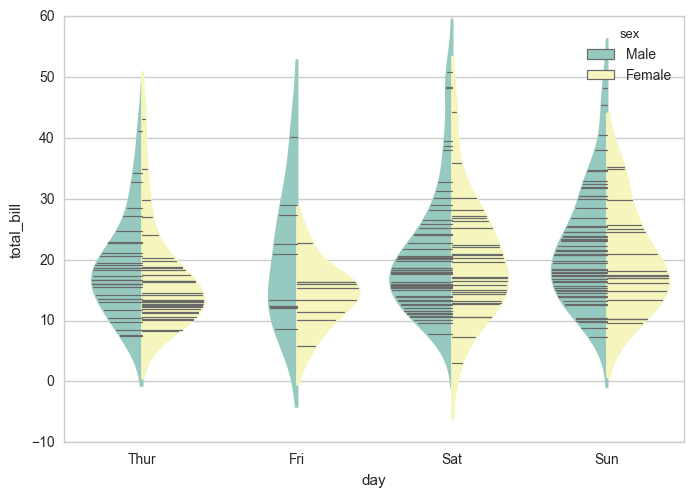

In [58]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

- 结合使用以显示每个样本及其分布 combine swarmplot() or swarmplot() with violinplot() or boxplot()
> - It can also be useful to combine swarmplot() or swarmplot() with violinplot() or boxplot() to show each observation along with a summary of the distribution

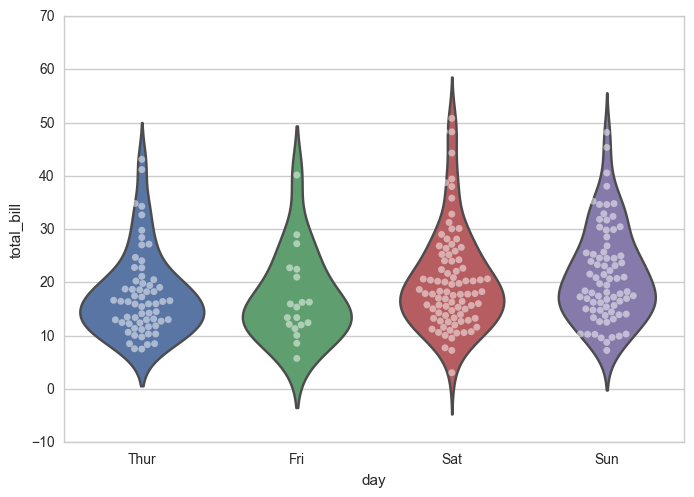

In [59]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

### 3 统计估计（Statistical estimation within categories）

#### 3.1 条形图（Bar plots）
- 可以显示各种估计，默认为均值。误差线是由bootstrapping计算的置信区间
> - the barplot() function operates on a full dataset and shows an arbitrary estimate, using the mean by default. > - When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate and plots that using error bars

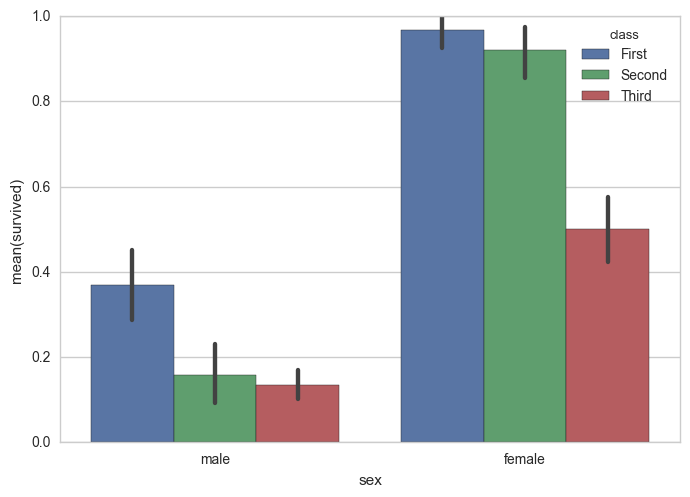

In [60]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

- 显示每类的样本数countplot()
> - A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. 
> - This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function

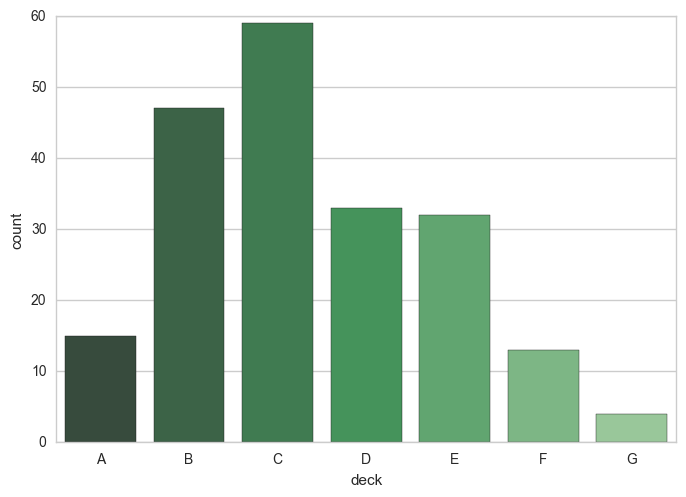

In [61]:
sns.countplot(x="deck", data=titanic, palette="Greens_d");

- 适用于barplot() and countplot()的操作包括上面提到的所有（本节）
> - Both barplot() and countplot() can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function

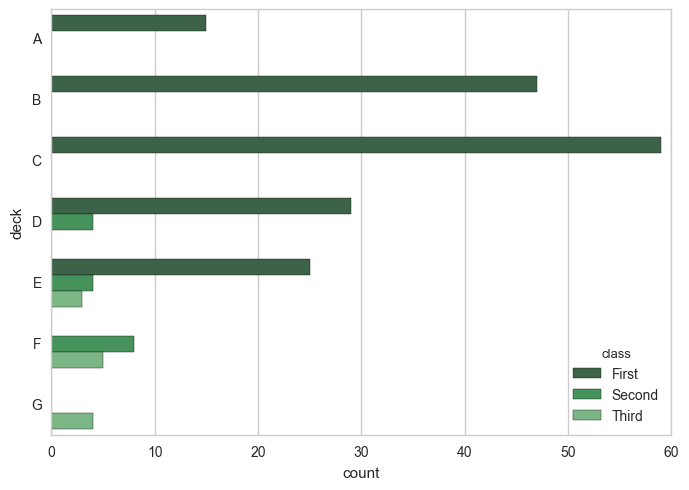

In [62]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

#### 3.2 点图（Point plots）
- This function also encodes the value of the estimate with height on the other axis, but rather than show a full bar it just plots the point estimate and confidence interval. 
- Additionally, pointplot connects points from the same hue category. 
- This makes it easy to see how the main relationship is changing as a function of a second variable, because your eyes are quite good at picking up on differences of slopes

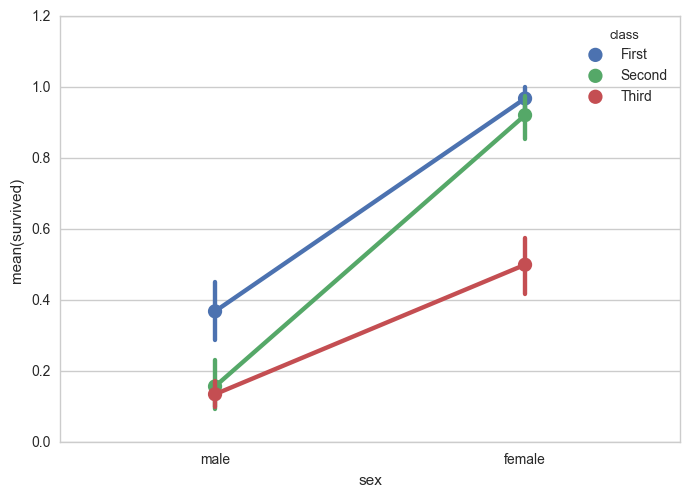

In [63]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

- 调整显示的标记和线型
> - To make figures that reproduce well in black and white, it can be good to use different markers and line styles for the levels of the hue category

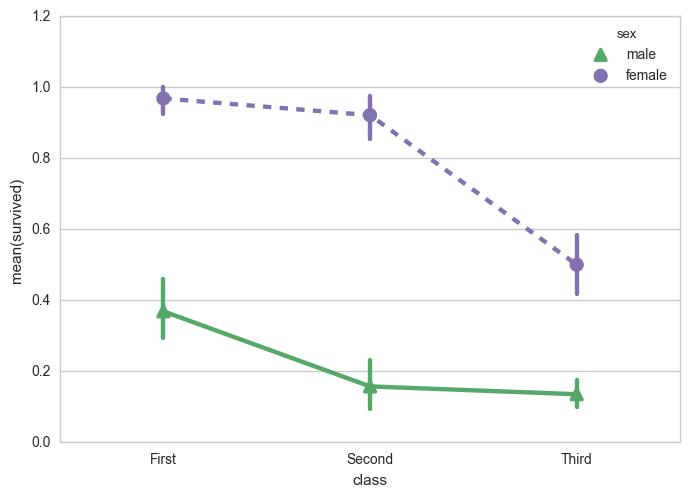

In [64]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### 4 Plotting “wide-form” data
- 传入其他格式的数据给参数data绘图，包括pandas DataFrames or two-dimensional numpy arrays
> - While using “long-form” or “tidy” data is preferred, these functions can also by applied to “wide-form” data in a variety of formats, including pandas DataFrames or two-dimensional numpy arrays. 
> - These objects should be passed directly to the data parameter

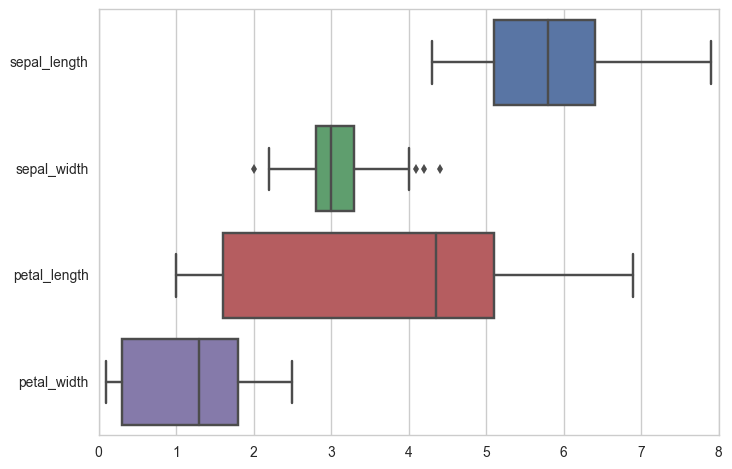

In [65]:
sns.boxplot(data=iris, orient="h");

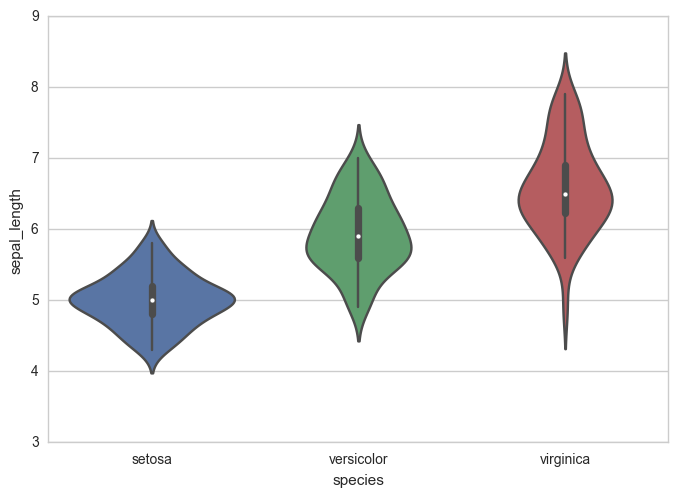

In [66]:
# Additionally, these functions accept vectors of Pandas or numpy objects rather than variables in a DataFrame
sns.violinplot(x=iris.species, y=iris.sepal_length);

- 需用matplotlib commands控制图形的大小和形状
> - To control the size and shape of plots made by the functions discussed above, you must set up the figure yourself using matplotlib commands. 
> - Of course, this also means that the plots can happily coexist in a multi-panel figure with other kinds of plots

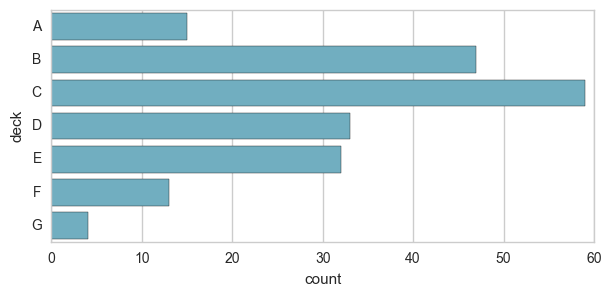

In [67]:
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

### 4 Drawing multi-panel categorical plots
- you can either use the functions introduced above, or the higher-level function factorplot(), which combines these functions with a FacetGrid() to add the ability to examine additional categories through the larger structure of the figure. 
- By default, factorplot() produces a pairplot()

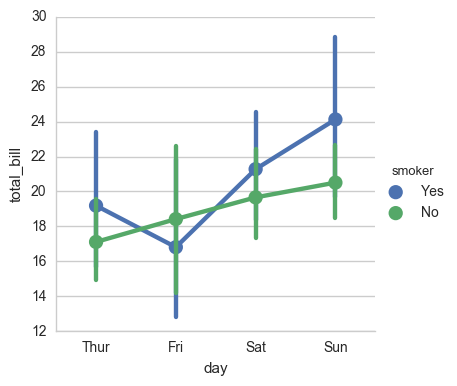

In [68]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

- 使用参数kind，选择所需绘制的图形
> - the kind parameter lets you chose any of the kinds of plots discussed above

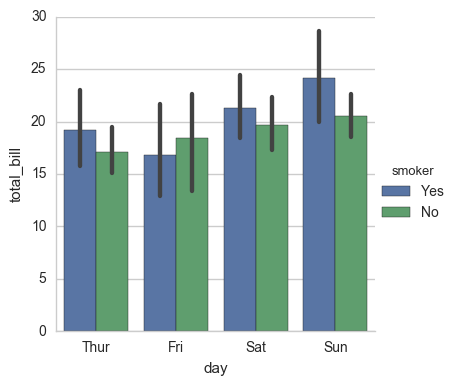

In [69]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

- factorplot()函数最大的优势在于很容易绘制各部分图形，以探索其他类别变量的作用
> - The main advantage of using a factorplot() is that it is very easy to “facet” the plot and investigate the role of other categorical variables

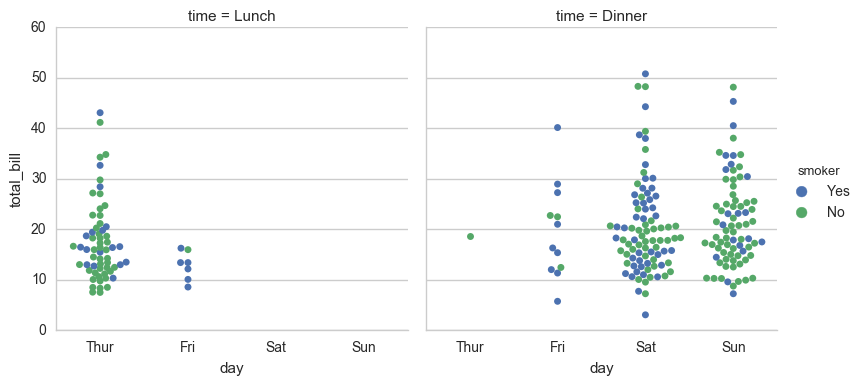

In [70]:
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

- 可以绘制各种图形，并调整大小和形状
> - Any kind of plot can be drawn. Because of the way FacetGrid works, to change the size and shape of the figure you need to specify the size and aspect arguments, which apply to each facet

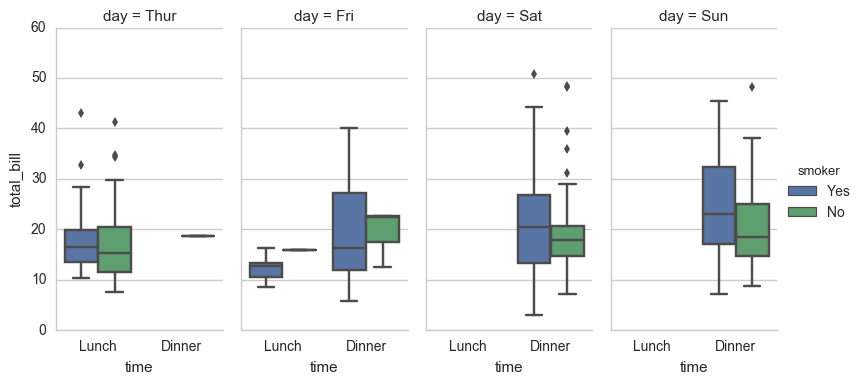

In [71]:
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

- 可以使用boxplot() and FacetGrid直接绘图
> - It is important to note that you could also make this plot by using boxplot() and FacetGrid directly. 
> - However, special care must be taken to ensure that the order of the categorical variables is enforced in each facet, either by using data with a Categorical datatype or by passing order and hue_order

- 能在更复杂的场景中运用
> - Because of the generalized API of the categorical plots, they should be easy to apply to other more complex contexts. 
> - For example, they are easily combined with a PairGrid to show categorical relationships across several different variables

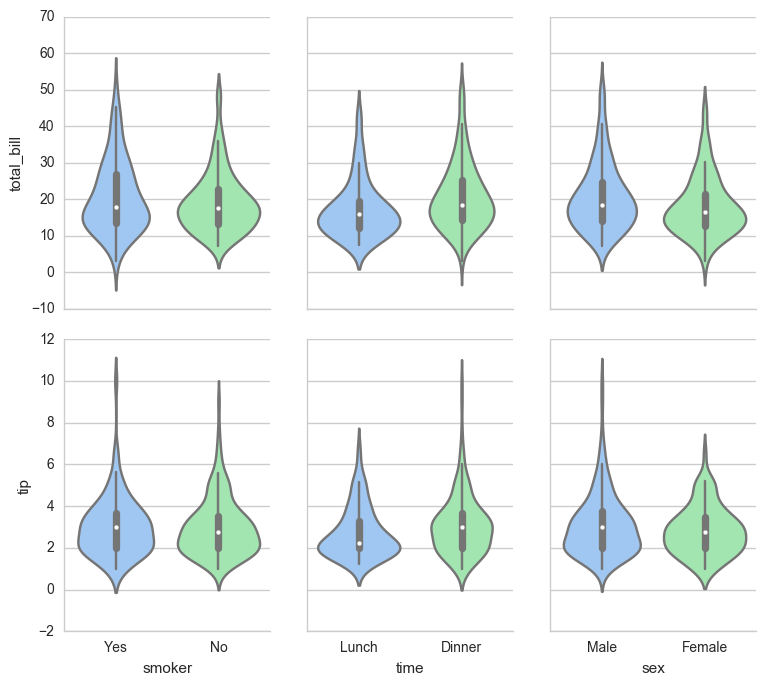

In [72]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");